In [ ]:
#  Macroeconomics Forecasting using LSTM (India GDP Prediction)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense


In [ ]:
#  Load the Data
df = pd.read_csv("Countries GDP 1960-2020.csv")


In [ ]:
# Filter for India
country = "India"
gdp_data = df[df["Country Name"] == country].iloc[:, 4:].T
gdp_data.columns = ['GDP']
gdp_data.index = gdp_data.index.astype(int)

In [ ]:
#  Normalize the Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(gdp_data)

In [ ]:
#  Create sequences for LSTM
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

seq_length = 5
X, y = create_sequences(scaled_data, seq_length)

In [ ]:
#  Train/Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [ ]:
#  Build LSTM Model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#  Train the Model
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
#  Predict and Inverse Transform
predicted = model.predict(X_test)
predicted_gdp = scaler.inverse_transform(predicted)
actual_gdp = scaler.inverse_transform(y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


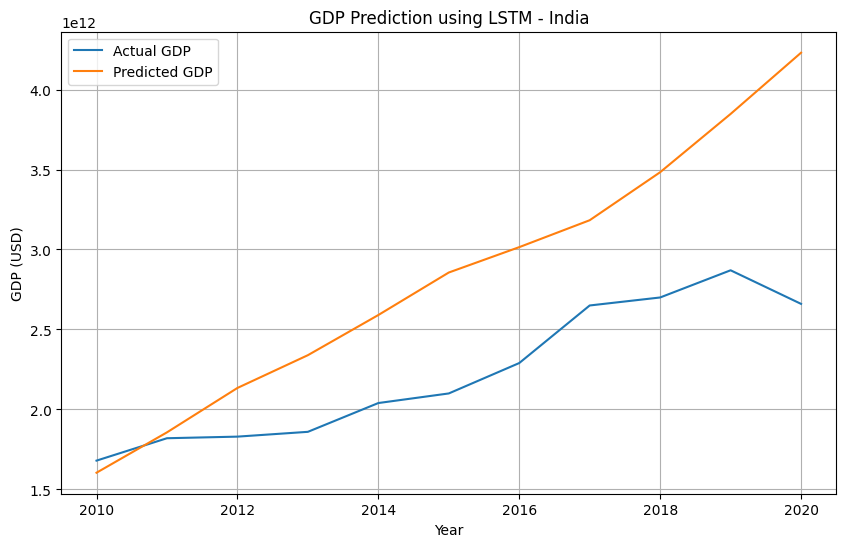

In [ ]:
#  Plot Results
years = gdp_data.index[seq_length + train_size:]

plt.figure(figsize=(10,6))
plt.plot(years, actual_gdp, label="Actual GDP")
plt.plot(years, predicted_gdp, label="Predicted GDP")
plt.title("GDP Prediction using LSTM - India")
plt.xlabel("Year")
plt.ylabel("GDP (USD)")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
"""#  Macroeconomics Forecasting using LSTM (India GDP Prediction)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
#  Load the Data
df = pd.read_csv("Countries GDP 1960-2020.csv")
# Filter for India
country = "India"
gdp_data = df[df["Country Name"] == country].iloc[:, 4:].T
gdp_data.columns = ['GDP']
gdp_data.index = gdp_data.index.astype(int)
#  Normalize the Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(gdp_data)
#  Create sequences for LSTM
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

seq_length = 5
X, y = create_sequences(scaled_data, seq_length)
#  Train/Test Split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
#  Build LSTM Model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
#  Train the Model
model.fit(X_train, y_train, epochs=100, verbose=0)
#  Predict and Inverse Transform
predicted = model.predict(X_test)
predicted_gdp = scaler.inverse_transform(predicted)
actual_gdp = scaler.inverse_transform(y_test)
#  Plot Results
years = gdp_data.index[seq_length + train_size:]

plt.figure(figsize=(10,6))
plt.plot(years, actual_gdp, label="Actual GDP")
plt.plot(years, predicted_gdp, label="Predicted GDP")
plt.title("GDP Prediction using LSTM - India")
plt.xlabel("Year")
plt.ylabel("GDP (USD)")
plt.legend()
plt.grid(True)
plt.show()
"""

'#  Macroeconomics Forecasting using LSTM (India GDP Prediction)\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom sklearn.preprocessing import MinMaxScaler\nfrom keras.models import Sequential\nfrom keras.layers import LSTM, Dense\n#  Load the Data\ndf = pd.read_csv("Countries GDP 1960-2020.csv")\n# Filter for India\ncountry = "India"\ngdp_data = df[df["Country Name"] == country].iloc[:, 4:].T\ngdp_data.columns = [\'GDP\']\ngdp_data.index = gdp_data.index.astype(int)\n#  Normalize the Data\nscaler = MinMaxScaler()\nscaled_data = scaler.fit_transform(gdp_data)\n#  Create sequences for LSTM\ndef create_sequences(data, seq_length):\n    x, y = [], []\n    for i in range(len(data) - seq_length):\n        x.append(data[i:i+seq_length])\n        y.append(data[i+seq_length])\n    return np.array(x), np.array(y)\n\nseq_length = 5\nX, y = create_sequences(scaled_data, seq_length)\n#  Train/Test Split\ntrain_size = int(len(X) * 0.8)\nX_train, X_test = X[:train_size

In [13]:
"""# 📌 STEP 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# 📌 STEP 2: Load and Prepare the Data
df = pd.read_csv("Countries GDP 1960-2020.csv")

# Select one country, e.g., Australia
country = "Australia"
gdp_data = df[df["Country Name"] == country].iloc[:, 4:].T  # GDP from 1960 to 2020
gdp_data.columns = ['GDP']
gdp_data.index = gdp_data.index.astype(int)

# 📌 STEP 3: Normalize Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(gdp_data)

# 📌 STEP 4: Create Sequences for LSTM
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

seq_length = 5
X, y = create_sequences(scaled_data, seq_length)

# 📌 STEP 5: Split into Training and Test Sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 📌 STEP 6: Build LSTM Model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 📌 STEP 7: Train the Model
model.fit(X_train, y_train, epochs=100, verbose=0)

# 📌 STEP 8: Predict and Inverse Transform
predicted = model.predict(X_test)
predicted_gdp = scaler.inverse_transform(predicted)
actual_gdp = scaler.inverse_transform(y_test)

# 📌 STEP 9: Visualization
years = gdp_data.index[seq_length + train_size:]

plt.figure(figsize=(10,6))
plt.plot(years, actual_gdp, label="Actual GDP")
plt.plot(years, predicted_gdp, label="Predicted GDP")
plt.title(f"GDP Prediction using LSTM - {country}")
plt.xlabel("Year")
plt.ylabel("GDP (USD)")
plt.legend()
plt.grid(True)
plt.show()
"""

'# 📌 STEP 1: Import Libraries\nimport numpy as np\nimport pandas as pd\nimport matplotlib.pyplot as plt\nfrom sklearn.preprocessing import MinMaxScaler\nfrom keras.models import Sequential\nfrom keras.layers import LSTM, Dense\n\n# 📌 STEP 2: Load and Prepare the Data\ndf = pd.read_csv("Countries GDP 1960-2020.csv")\n\n# Select one country, e.g., Australia\ncountry = "Australia"\ngdp_data = df[df["Country Name"] == country].iloc[:, 4:].T  # GDP from 1960 to 2020\ngdp_data.columns = [\'GDP\']\ngdp_data.index = gdp_data.index.astype(int)\n\n# 📌 STEP 3: Normalize Data\nscaler = MinMaxScaler()\nscaled_data = scaler.fit_transform(gdp_data)\n\n# 📌 STEP 4: Create Sequences for LSTM\ndef create_sequences(data, seq_length):\n    x, y = [], []\n    for i in range(len(data) - seq_length):\n        x.append(data[i:i+seq_length])\n        y.append(data[i+seq_length])\n    return np.array(x), np.array(y)\n\nseq_length = 5\nX, y = create_sequences(scaled_data, seq_length)\n\n# 📌 STEP 5: Split into Tra

In [1]:
#australia

In [3]:
# 📌 STEP 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense



In [4]:
# 📌 STEP 2: Load and Prepare the Data
df = pd.read_csv("Countries GDP 1960-2020.csv")

In [5]:
# Select one country, e.g., Australia
country = "Australia"
gdp_data = df[df["Country Name"] == country].iloc[:, 4:].T  # GDP from 1960 to 2020
gdp_data.columns = ['GDP']
gdp_data.index = gdp_data.index.astype(int)


In [6]:
# 📌 STEP 3: Normalize Data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(gdp_data)


In [7]:
# 📌 STEP 4: Create Sequences for LSTM
def create_sequences(data, seq_length):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

seq_length = 5
X, y = create_sequences(scaled_data, seq_length)


In [8]:
# 📌 STEP 5: Split into Training and Test Sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [9]:
# 📌 STEP 6: Build LSTM Model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# 📌 STEP 7: Train the Model
model.fit(X_train, y_train, epochs=100, verbose=0)


In [11]:
# 📌 STEP 8: Predict and Inverse Transform
predicted = model.predict(X_test)
predicted_gdp = scaler.inverse_transform(predicted)
actual_gdp = scaler.inverse_transform(y_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 836ms/step


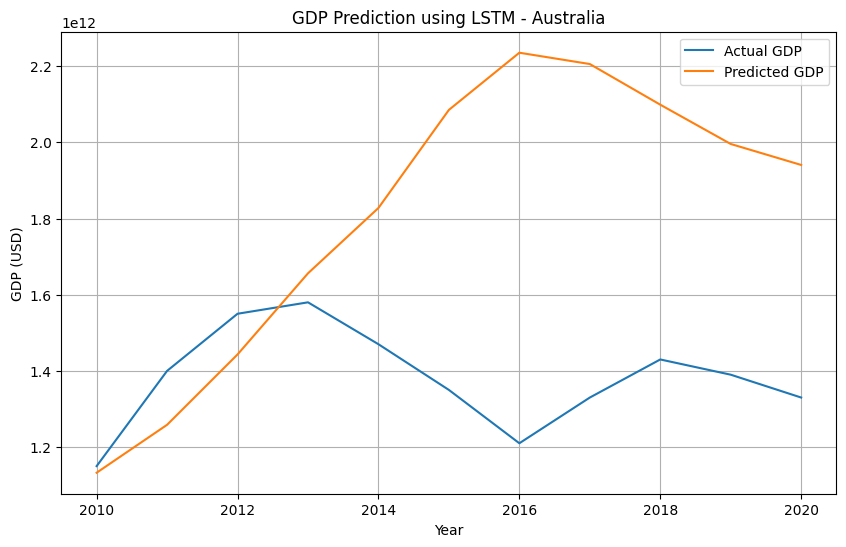

In [12]:
# 📌 STEP 9: Visualization
years = gdp_data.index[seq_length + train_size:]
plt.figure(figsize=(10,6))
plt.plot(years, actual_gdp, label="Actual GDP")
plt.plot(years, predicted_gdp, label="Predicted GDP")
plt.title(f"GDP Prediction using LSTM - {country}")
plt.xlabel("Year")
plt.ylabel("GDP (USD)")
plt.legend()
plt.grid(True)
plt.show()